<a href="https://colab.research.google.com/github/Angelogallardo05/DATA602-final/blob/main/Data_602_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install geopandas
import geopandas as gpd

import seaborn as sns
import matplotlib.pyplot as plt

Abstract:
This study investigates the purchasing behavior of cusomters based on demographic factors such as gender, age, state, and payment method using a dataset of customer purchase records. The analysis aims to understand the typical purchase frequency patterns among different demographic groups and identify the most commonly used payment methods within these groups.

The analysis begins by filtering the data to include specific demographic segments such as males and females, and grouping the data by season and age. The main focus is on determining the most frequently observed purchase frequency within each demographic group, shedding light on the typical buying habits of customers across different regions and age brackets.

Key findings reveal significant insights into customer behavior. For example, the study uncovers that certain age groups in specific states exhibit higher purchase frequencies compared to others. Additionally, the analysis identifies prevelant payment methods favored by different demographic groups, highlighting preferences that could infrom marketing strategies.

This research contributes to the field of condumer behavior by providing emprirical evidence on how demographic factors influence pruchasing decisions and payment method choices. The findings offfer actionable insights for businesses aiming to optimize their marketing strategies and tailor promotional efforts based on customer demographics.

The methodology employed leverages data analysis techniques using Python and pandas, including grouping, aggregation, and sorting to generate meaningful summaries and tables. Visualizations such as summary tables and sorted results facilitate a clear presentation of the findings, enabling stakeholders to grasp key patterns and trends in conumer behavior accross diverse demographic categories.

Overall, the study underscores the importance of understanding demographoc variations in purchasing behavior for effective marketing and business decision-making, emphasizing preferences. The finidngs contribute to enhancing customer-centric strategies and optimizing resource allocation in marketing campaihgns

In [4]:
df = pd.read_csv("/content/shopping_trends_updated.csv")

In [5]:
df.head(15)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


**Research Question:How does customer preferences vary accross different demograohics (age, gender, location)? Do seasonal trends influence product preferences? How do they change during holidays or special events?**

Summary statistics by gender: Men and woman on average spend the  amount per transactio; the ages of online buyers is 44 years old. Men typically leave lower ratings.

In [6]:
# Calculate summary statistics by gender
summary_stats_by_gender = df.groupby('Gender')[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']].describe()

# Add mode calculation separately for categorical columns
mode_age_by_gender = df.groupby('Gender')['Age'].apply(lambda x: x.mode()[0])  # Mode of 'Age' by gender
mode_review_rating_by_gender = df.groupby('Gender')['Review Rating'].apply(lambda x: x.mode()[0])  # Mode of 'Review Rating' by gender

# Append mode values to the summary statistics DataFrame
summary_stats_by_gender.loc[:, 'mode_age'] = mode_age_by_gender.values
summary_stats_by_gender.loc[:, 'mode_review_rating'] = mode_review_rating_by_gender.values

# Display the computed summary statistics by gender
summary_stats_by_gender

Age                                                      \
         count       mean        std   min   25%   50%   75%   max   
Gender                                                               
Female  1248.0  44.007212  14.953843  18.0  31.0  44.0  57.0  70.0   
Male    2652.0  44.097285  15.328257  18.0  31.0  44.0  57.0  70.0   

       Purchase Amount (USD)             ... Previous Purchases             \
                       count       mean  ...              count       mean   
Gender                                   ...                                 
Female                1248.0  60.249199  ...             1248.0  24.596154   
Male                  2652.0  59.536199  ...             2652.0  25.707014   

                                                mode_age mode_review_rating  
              std  min    25%   50%   75%   max                              
Gender                                                                       
Female  14.579221  1.0  12.00  24.0  37.0  50.0       45                4.0  
Male    14.373570  1.0  13.75  26.0  38.0  50.0       41                3.4  

[2 rows x 34 columns]

In this chart we see that men and women shop more during the Spring, we se that more men shop online. We will analyze why that is.

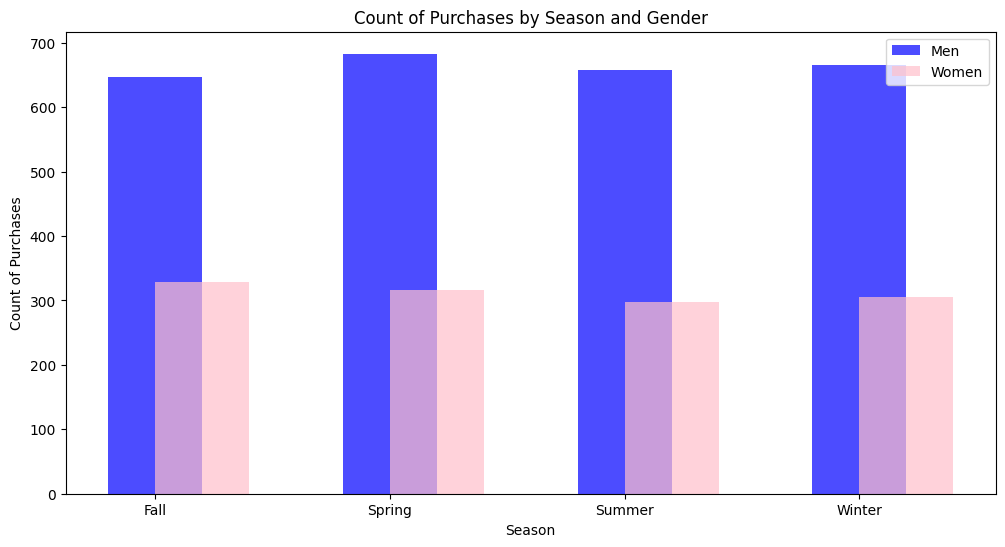

In [43]:
# Filter DataFrame for purchases made by men and women separately
purchases_by_gender = df.groupby(['Season', 'Gender']).size().unstack()

# Get unique seasons from the DataFrame
seasons = purchases_by_gender.index

# Extract counts for men and women
men_counts = purchases_by_gender['Male']
women_counts = purchases_by_gender['Female']

# Plotting two separate bar plots (one for men and one for women)
plt.figure(figsize=(12, 6))  # Set the figure size

# Plotting bar plot for men
plt.bar(seasons, men_counts, label='Men', alpha=0.7, color='blue', width=0.4)

# Plotting bar plot for women (shifted slightly for separation)
plt.bar(seasons, women_counts, label='Women', alpha=0.7, color='pink', width=0.4, align='edge')

# Adding labels and title
plt.xlabel('Season')
plt.ylabel('Count of Purchases')
plt.title('Count of Purchases by Season and Gender')
plt.legend()

plt.show()


These are the top five products sold by season for the total population. Next, we will split the purchases between men and women.

<Figure size 1200x800 with 0 Axes>

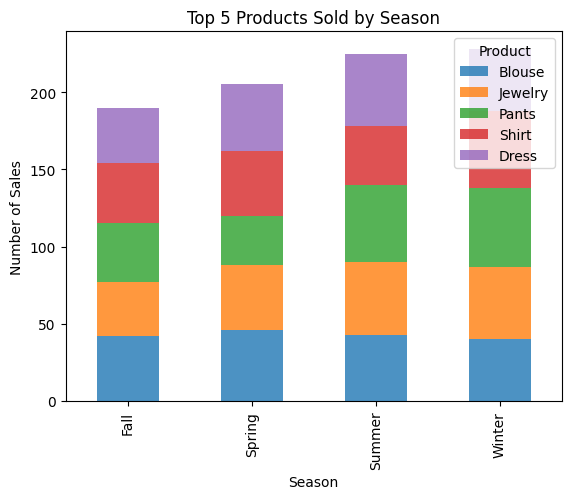

In [7]:
products_by_season = df.groupby(['Season', 'Item Purchased']).size().unstack()

# Calculate total sales count for each product across all seasons
product_totals = products_by_season.sum(axis=0)

# Identify top 5 products based on total sales count
top_products = product_totals.nlargest(5).index.tolist()

# Filter the products_by_season DataFrame to include only top 5 products
filtered_products_by_season = products_by_season[top_products]

# Plotting a stacked bar chart to show top 5 products sold by season
plt.figure(figsize=(12, 8))  # Set the figure size

# Plotting stacked bars for each of the top 5 products
filtered_products_by_season.plot(kind='bar', stacked=True, alpha=0.8)

# Adding labels and title
plt.xlabel('Season')
plt.ylabel('Number of Sales')
plt.title('Top 5 Products Sold by Season')
plt.legend(title='Product')

# Show plot
plt.show()

When we filter top 5 products sold by men we see that men purchase more sweaters and dresses in the spring. Suprisingly, there seems to be the same amount of coat purchases furing all seasons. Lastly, Jewelry purchases increase in the summer.


<Figure size 1200x800 with 0 Axes>

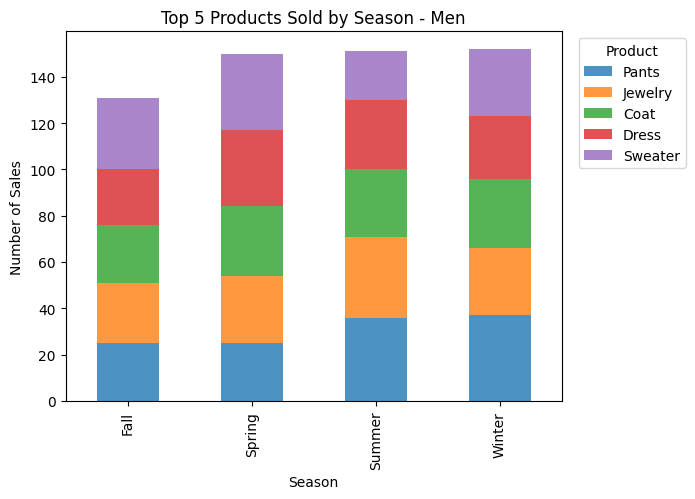

In [8]:
men_df = df[df['Gender'] == 'Male']
products_by_season_men = men_df.groupby(['Season', 'Item Purchased']).size().unstack()

# Calculate total sales count for each product across all seasons for men
product_totals_men = products_by_season_men.sum(axis=0)

# Identify top 5 products based on total sales count for men
top_products_men = product_totals_men.nlargest(5).index.tolist()

# Filter the products_by_season DataFrame to include only top 5 products for men
filtered_products_by_season_men = products_by_season_men[top_products_men]

# Plotting stacked bar chart for top 5 products sold by season - Men
plt.figure(figsize=(12, 8))  # Set the figure size

# Plotting stacked bars for top 5 products sold by season - Men
filtered_products_by_season_men.plot(kind='bar', stacked=True, alpha=0.8)

# Adding labels and title
plt.xlabel('Season')
plt.ylabel('Number of Sales')
plt.title('Top 5 Products Sold by Season - Men')
plt.legend(title='Product')

plt.legend(title='Product', bbox_to_anchor=(1.02, 1), loc='upper left')
# Show plot
plt.show()

Top 5 products sold by season - woman
Interestingly, it does not look like women shop for men products in contrast to men shopping behaviors, in this dataset. More socks are purchased by women in the fall than any other season, and more sandals are purchased during the spring.

<Figure size 1200x800 with 0 Axes>

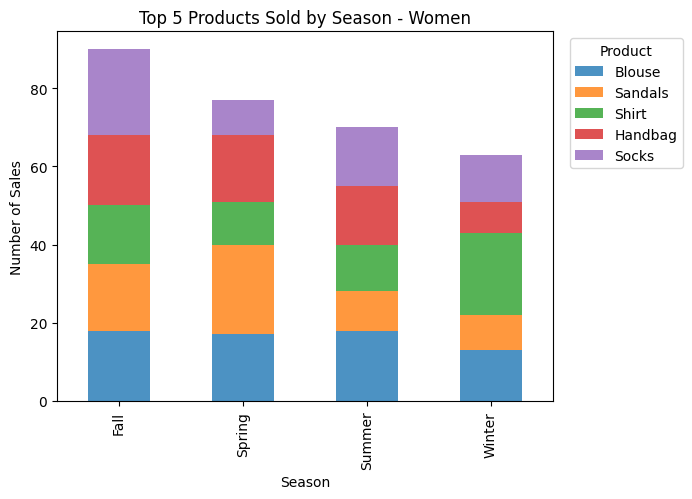

In [19]:
women_df = df[df['Gender'] == 'Female']
products_by_season_women = women_df.groupby(['Season', 'Item Purchased']).size().unstack()

# Calculate total sales count for each product across all seasons for women
product_totals_women = products_by_season_women.sum(axis=0)

# Identify top 5 products based on total sales count for women
top_products_women = product_totals_women.nlargest(5).index.tolist()

# Filter the products_by_season DataFrame to include only top 5 products for women
filtered_products_by_season_women = products_by_season_women[top_products_women]


plt.figure(figsize=(12, 8))  # Set the figure size


filtered_products_by_season_women.plot(kind='bar', stacked=True, alpha=0.8)

# Adding labels and title
plt.xlabel('Season')
plt.ylabel('Number of Sales')
plt.title('Top 5 Products Sold by Season - Women')
plt.legend(title='Product')

plt.legend(title='Product', bbox_to_anchor=(1.02, 1), loc='upper left')
# Show plot
plt.show()

** Now we will analyze the shopping trend by State. **

Average spend by state, season, and gender highlights

1.   Alabama females typically spend around $89 in the summer
2.   Southern state women spend more $ on average in the Summer



In [10]:
average_spending_by_state_season = df.groupby(['Location', 'Season','Gender'])['Purchase Amount (USD)'].mean().reset_index()

# Sort the average spending in descending order by purchase amount
sorted_average_spending = average_spending_by_state_season.sort_values(by='Purchase Amount (USD)', ascending=False)

# Display the sorted average spending by state and season
sorted_average_spending.head(10)

,Location,Season,Gender,Purchase Amount (USD)
4,Alabama,Summer,Female,89.250000
8,Alaska,Fall,Female,85.500000
242,New Mexico,Spring,Female,83.333333
16,Arizona,Fall,Female,79.428571
104,Indiana,Fall,Female,78.500000
283,Oklahoma,Summer,Female,78.500000
322,South Dakota,Summer,Female,78.166667
362,Virginia,Summer,Female,78.125000
95,Idaho,Winter,Male,77.555556
14,Alaska,Winter,Female,77.200000


List of top purchases by State:

In [11]:
# Group the DataFrame by state (Location), season, and item purchased, and count the occurrences
item_counts_by_state_season = df.groupby(['Location',  'Item Purchased']).size().reset_index(name='Purchase Count')

# Sort the item counts by state, season, and purchase count in descending order
sorted_item_counts_by_state_season = item_counts_by_state_season.sort_values(by=[  'Purchase Count'], ascending=[ False])

# Display the most frequently purchased items by state and season in descending order of count
sorted_item_counts_by_state_season.head(10)

,Location,Item Purchased,Purchase Count
544,Minnesota,Skirt,11
1046,Utah,Shorts,10
647,Nevada,Backpack,10
306,Illinois,Shirt,10
516,Michigan,Sandals,9
12,Alabama,Jewelry,8
266,Idaho,Belt,8
798,North Dakota,Jacket,8
623,Nebraska,Backpack,8
1148,West Virginia,Sunglasses,8


** Purchase frequency analysis **

Customers typically purchase every three months and annually more than any other frequency. However, the frequencies seem to be symmetrical.

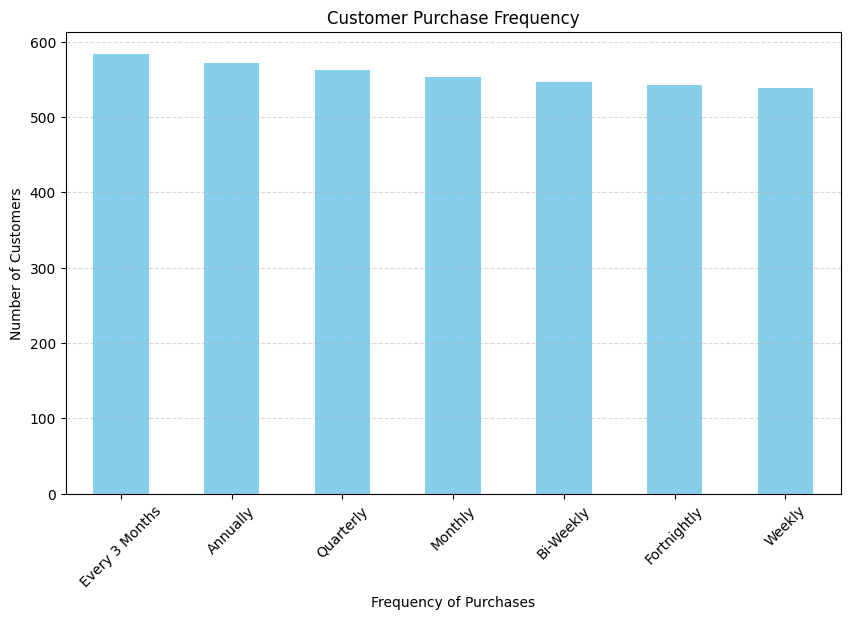

Purchase Frequency Counts:
 Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64


In [12]:
purchase_frequency_counts = df['Frequency of Purchases'].value_counts()

# Plotting a bar chart to visualize purchase frequency distribution
plt.figure(figsize=(10, 6))
purchase_frequency_counts.plot(kind='bar', color='skyblue')
plt.title('Customer Purchase Frequency')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Print the purchase frequency counts
print("Purchase Frequency Counts:\n", purchase_frequency_counts)

This table represents the relationship between the frequency of purchases and the payment methods used. Here we see that customers use credit cards and Paypal to purchase online item more than any other type.

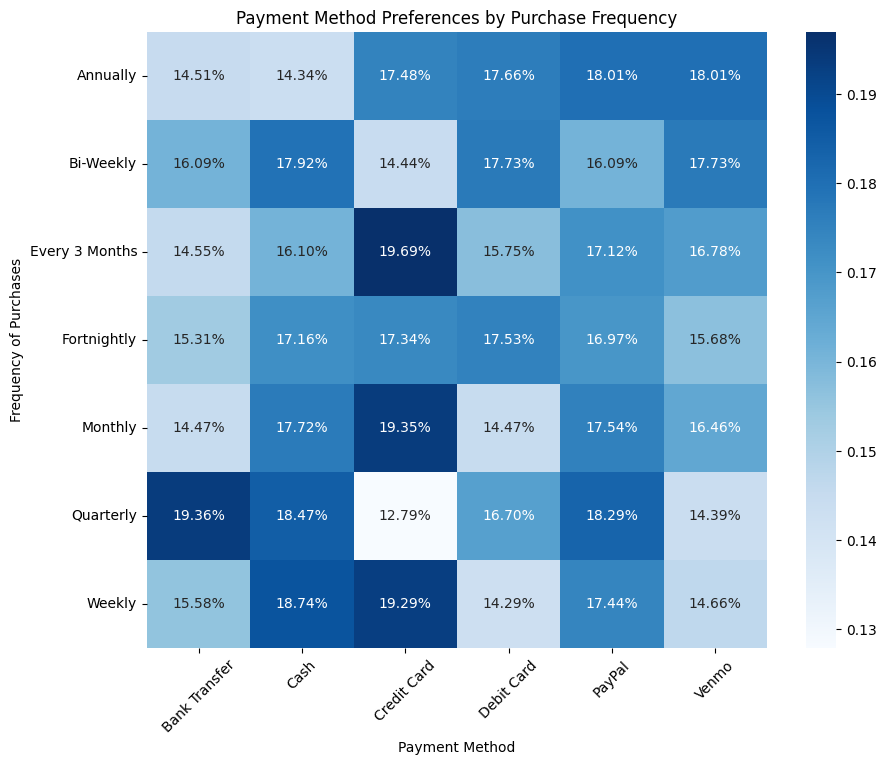

Payment Method Preferences by Purchase Frequency:
 Payment Method          Bank Transfer  Cash  Credit Card  Debit Card  PayPal  \
Frequency of Purchases                                                         
Annually                           83    82          100         101     103   
Bi-Weekly                          88    98           79          97      88   
Every 3 Months                     85    94          115          92     100   
Fortnightly                        83    93           94          95      92   
Monthly                            80    98          107          80      97   
Quarterly                         109   104           72          94     103   
Weekly                             84   101          104          77      94   

Payment Method          Venmo  
Frequency of Purchases         
Annually                  103  
Bi-Weekly                  97  
Every 3 Months             98  
Fortnightly                85  
Monthly                    91  
Quar

In [13]:
purchase_payment_counts = df.groupby(['Frequency of Purchases', 'Payment Method']).size().unstack(fill_value=0)

# Normalize counts to percentages within each purchase frequency category
purchase_payment_percentages = purchase_payment_counts.apply(lambda x: x / x.sum(), axis=1)

# Plotting a heatmap to visualize payment method preferences across purchase frequencies
plt.figure(figsize=(10, 8))
sns.heatmap(purchase_payment_percentages, cmap='Blues', annot=True, fmt=".2%", cbar=True)
plt.title('Payment Method Preferences by Purchase Frequency')
plt.xlabel('Payment Method')
plt.ylabel('Frequency of Purchases')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Print the payment method preferences by purchase frequency
print("Payment Method Preferences by Purchase Frequency:\n", purchase_payment_counts)

Here wan can conclude that discounts and promo codes does impact puchast behaviors for online customers.

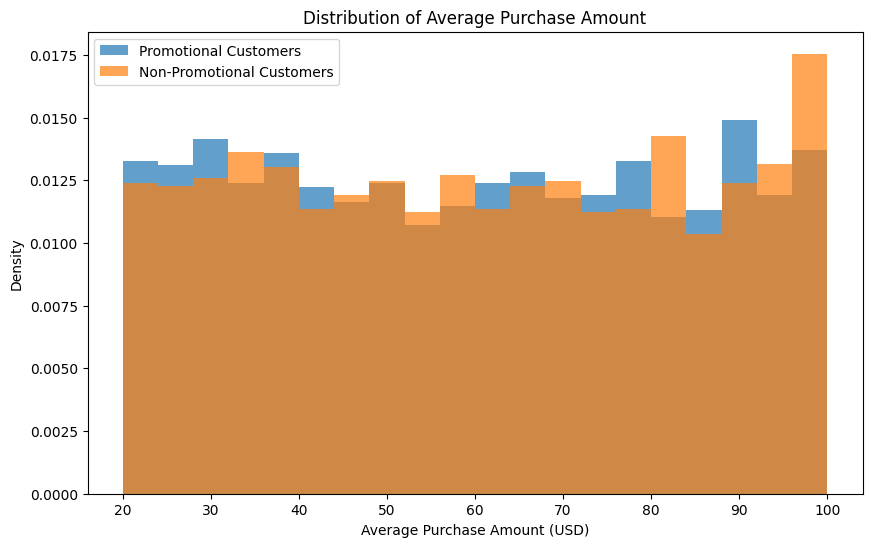

Summary Statistics - Promotional Customers:
        Purchase Amount (USD)
count            1677.000000
mean               59.279070
std                23.610697
min                20.000000
25%                38.000000
50%                60.000000
75%                80.000000
max               100.000000

Summary Statistics - Non-Promotional Customers:
        Purchase Amount (USD)
count            2223.000000
mean               60.130454
std                23.740327
min                20.000000
25%                39.000000
50%                60.000000
75%                81.000000
max               100.000000


In [14]:
promotional_customers = df[(df['Discount Applied'] == 'Yes') | (df['Promo Code Used'] == 'Yes')]

# Group by customer and calculate average purchase amount and purchase count
promotional_summary = promotional_customers.groupby('Customer ID').agg({
    'Purchase Amount (USD)': 'mean',  # Average purchase amount
    'Frequency of Purchases': lambda x: x.value_counts().index[0]  # Most frequent purchase frequency
}).rename(columns={'Frequency of Purchases': 'Most Frequent Purchase Frequency'})

# Calculate metrics for non-promotional customers
non_promotional_customers = df[(df['Discount Applied'] == 'No') & (df['Promo Code Used'] == 'No')]
non_promotional_summary = non_promotional_customers.groupby('Customer ID').agg({
    'Purchase Amount (USD)': 'mean',  # Average purchase amount
    'Frequency of Purchases': lambda x: x.value_counts().index[0]  # Most frequent purchase frequency
}).rename(columns={'Frequency of Purchases': 'Most Frequent Purchase Frequency'})

# Visualize average purchase amount for promotional vs. non-promotional customers
plt.figure(figsize=(10, 6))
plt.hist(promotional_summary['Purchase Amount (USD)'], alpha=0.7, label='Promotional Customers', bins=20, density=True)
plt.hist(non_promotional_summary['Purchase Amount (USD)'], alpha=0.7, label='Non-Promotional Customers', bins=20, density=True)
plt.title('Distribution of Average Purchase Amount')
plt.xlabel('Average Purchase Amount (USD)')
plt.ylabel('Density')
plt.legend()
plt.show()

# Print summary statistics for promotional vs. non-promotional customers
print("Summary Statistics - Promotional Customers:\n", promotional_summary.describe())
print("\nSummary Statistics - Non-Promotional Customers:\n", non_promotional_summary.describe())

Purchase Frequencey by gender, state, and age

In [15]:
# Group by 'Gender', 'Location' (state), and 'Age', and find the most frequently used purchase frequency
most_used_purchase_frequency = df.groupby(['Gender', 'Location', 'Age'])['Frequency of Purchases'].agg(lambda x: x.mode().iloc[0])

# Create a DataFrame to display the most used purchase frequency by state and age for both genders
purchase_frequency_table = pd.DataFrame(most_used_purchase_frequency).reset_index()
purchase_frequency_table.columns = ['Gender', 'State', 'Age', 'Most Used Purchase Frequency']

# Sort the table by 'Most Used Purchase Frequency' in descending order
purchase_frequency_table = purchase_frequency_table.sort_values(by='Most Used Purchase Frequency', ascending=False)

# Display the summary table of purchase frequency by state and age for both genders in descending order
print("Summary Table of Purchase Frequency by State and Age for Both Genders (Descending Order):\n")
purchase_frequency_table.head(30)

Summary Table of Purchase Frequency by State and Age for Both Genders (Descending Order):



,Gender,State,Age,Most Used Purchase Frequency
2218,Male,Oregon,65,Weekly
1017,Male,Alabama,54,Weekly
1179,Male,Colorado,58,Weekly
1182,Male,Colorado,61,Weekly
1185,Male,Colorado,68,Weekly
1192,Male,Connecticut,27,Weekly
1196,Male,Connecticut,36,Weekly
1207,Male,Connecticut,53,Weekly
1213,Male,Connecticut,63,Weekly
1215,Male,Connecticut,65,Weekly


Since men typically shop more online, I would like to see the frequency purchases for men, by state.

Highlights:
1. NY men typically shop monthly
2. Hawaii men on average shop weekly


In [16]:
# Filter the data to include only male customers
male_customers = df[df['Gender'] == 'Male']

# Group by 'Location' (state) and find the most frequently used purchase frequency
most_used_purchase_frequency = male_customers.groupby('Location')['Frequency of Purchases'].agg(lambda x: x.mode().iloc[0])

# Create a DataFrame to display the most used purchase frequency by state for males
male_purchase_frequency_table = pd.DataFrame(most_used_purchase_frequency).reset_index()
male_purchase_frequency_table.columns = ['State', 'Most Used Purchase Frequency']

# Display the table of males by state with most used purchase frequency
print("Table of Males by State with Most Used Purchase Frequency:\n")
print(male_purchase_frequency_table)

Table of Males by State with Most Used Purchase Frequency:

             State Most Used Purchase Frequency
0          Alabama               Every 3 Months
1           Alaska                  Fortnightly
2          Arizona                    Bi-Weekly
3         Arkansas                    Quarterly
4       California                      Monthly
5         Colorado                  Fortnightly
6      Connecticut                    Bi-Weekly
7         Delaware                      Monthly
8          Florida                     Annually
9          Georgia                     Annually
10          Hawaii                       Weekly
11           Idaho               Every 3 Months
12        Illinois                    Bi-Weekly
13         Indiana                     Annually
14            Iowa                    Quarterly
15          Kansas                     Annually
16        Kentucky                     Annually
17       Louisiana                       Weekly
18           Maine          

Conclusion:

This dataset showed that more men shopped online than women. Men purchases also includes women items, while women generally purchasd female related items. For instance, men shopped for dresses during all seasons, especially in the spring; presumably as gifts for women. In addition, men purchase more jewelry in the summer than any other season. On the other hand, women tend to shop more in the fall. Their top 5 product choices include socks, sandals, handbags, and shirts. More sandals are purchased in the spring, and more shirts are purchased in the winter.

This analysis also concluded that customers typically use many types of payment methods at the same rate. In addition, it looks like discounts and promotions did influence the amount of $ purchase except for purchases of $100. Finally, our last two lists show the shopping trends by state and gender. The first list highlights the frequency of purchase by state and age. For instance, males in Oregan typically purchase on a weekly basis. The last list shows the purchase frequncey by state only. I believe that these findings are useful for businesses to understand their costumers pattern behavavior in spend, product, and frequency. Businesses can use this to better advertise their products at the right time.